## Data Exploration

In [313]:
#import warnings
#warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt 

In [314]:
#Data Reading
data=pd.read_csv(r'''C:\Users\jamwa\Downloads\archive (1)\gender_classification_v7.csv''')
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [315]:
#Checking Null Values
data.isnull()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4996,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False
4999,False,False,False,False,False,False,False,False


In [316]:
#Dropping Null Values
data=data.dropna()

In [317]:
data.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [318]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 351.6+ KB


In [319]:
data.shape

(5001, 8)

In [320]:
data.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


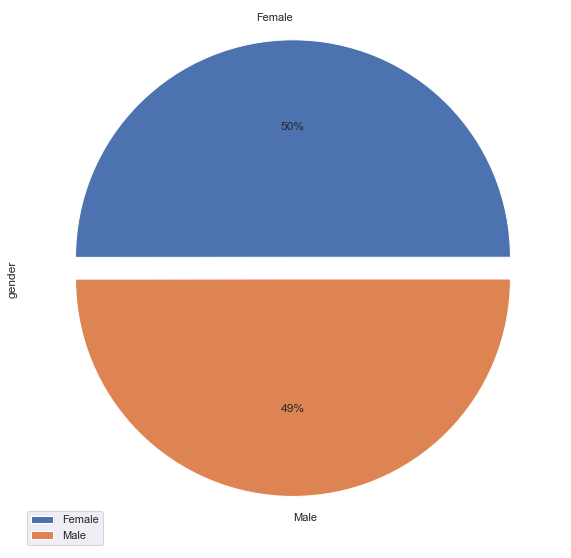

In [321]:
plt.figure(figsize=(10,10))
explode=[0.1,0]
data['gender'].value_counts().plot(kind='pie',autopct="%2i%%",explode=explode)
plt.legend()
plt.show()

Text(0.5, 1.0, 'Correlation between different fearures')

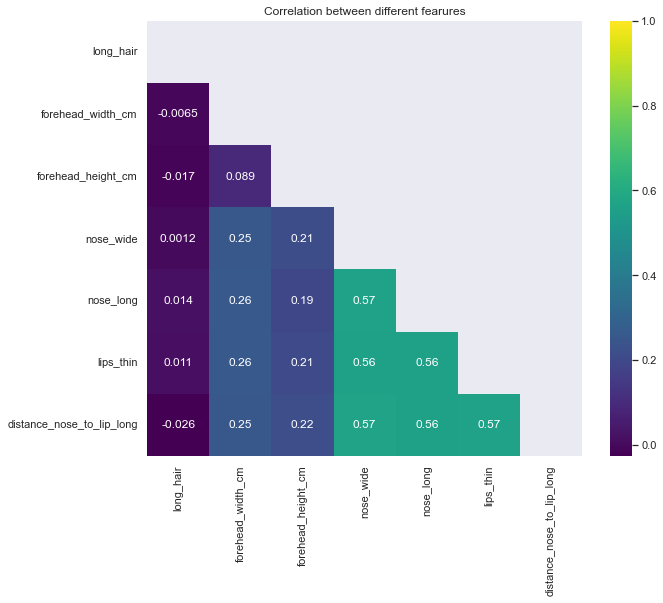

In [322]:
mask = np.zeros_like(data.corr())
mask[np.tril_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, vmax=1, square=True,annot=True,cmap='viridis', mask=mask.T)

plt.title('Correlation between different fearures')

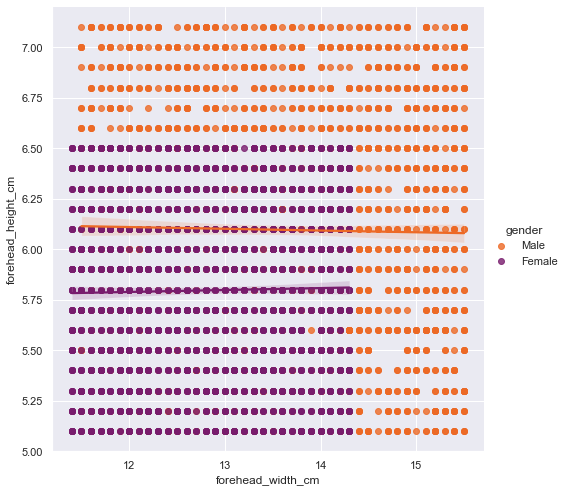

In [323]:
sns.lmplot(x="forehead_width_cm", y="forehead_height_cm", hue="gender", data=data, palette = 'inferno_r', height = 7)

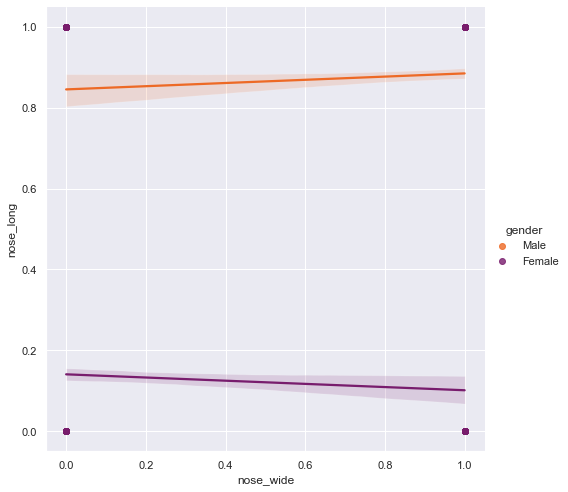

In [324]:
sns.lmplot(x="nose_wide", y="nose_long", hue="gender", data=data, palette = 'inferno_r', height = 7)

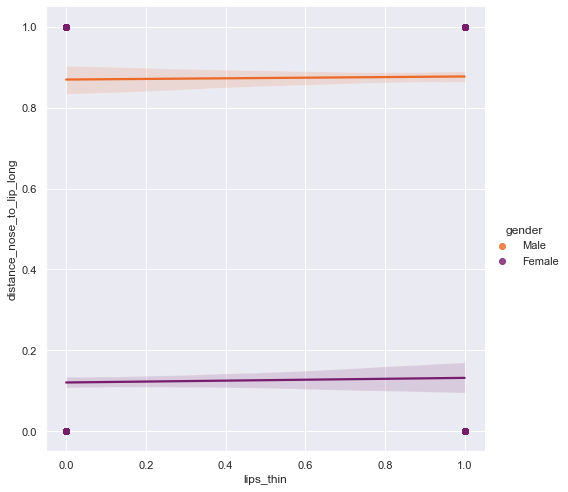

In [325]:
sns.lmplot(x="lips_thin", y="distance_nose_to_lip_long", hue="gender", data=data, palette = 'inferno_r', height = 7)

## Modelling

In [326]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, classification_report,confusion_matrix

In [327]:
Y = data.gender
X = data.drop(['gender'], axis = 1)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state =np.random.RandomState(0))

## Model Selection

In [328]:
from sklearn.model_selection import GridSearchCV
def tune_model(model,params):
    modelCV=GridSearchCV(estimator=model,
                     param_grid=params,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1,
                     verbose=1)
    modelCV.fit(x_train,y_train)
    print("best parameters : \n{}\n".format(modelCV.best_params_))
    print("accuracy : \n{}\n".format(modelCV.best_score_))

In [329]:
#Logistic Regression
reglog_params={"C":np.logspace(-3,3,7),
      "penalty":['l1', 'l2', 'elasticnet', 'none']}

reglog=LogisticRegression()

In [330]:
tune_model(reglog,reglog_params)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
best parameters : 
{'C': 0.1, 'penalty': 'l2'}

accuracy : 
0.96825



In [331]:
reglog=LogisticRegression(C=0.1,penalty='l2')
reglog.fit(x_train,y_train)

LogisticRegression(C=0.1)

In [332]:
def plot_results(labels,preds,model_name,plot_type='all'):
    def plot_confusion_matrix(labels, preds,model_name):
        plt.figure(1, figsize= (5, 5))
        plt.title("Confusion matrix for "+model_name)
        mat = confusion_matrix(labels, preds)
        sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
        plt.xlabel('true label')
        plt.ylabel('predicted label')
        plt.show()
        plt.close()

    def plot_classif_report(labels,preds,model_name):
        clf=classification_report(labels, preds,output_dict=True)
        plt.figure(1, figsize= (5,5))
        ax = plt.axes()
        sns.heatmap(pd.DataFrame(clf).iloc[:-1, :].T,annot=True)#annot=True
        ax.set_title("Classification report for "+model_name)
        plt.show()
        plt.close()
    if 'confusion' in plot_type:
        plot_confusion_matrix(labels,preds,model_name)
    elif 'report' in plot_type:
        plot_classif_report(labels,preds,model_name)
    elif 'all' in plot_type:
        plot_confusion_matrix(labels,preds,model_name)
        plot_classif_report(labels,preds,model_name)

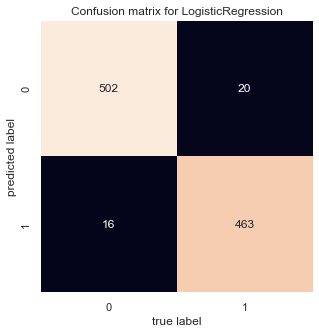

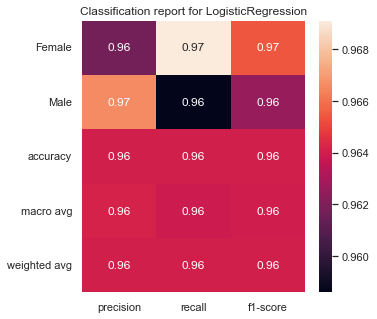

In [333]:
pred=reglog.predict(x_test)
plot_results(y_test,pred,'LogisticRegression',plot_type='all')


## K Nearest Neighbours

In [334]:
from sklearn.neighbors import KNeighborsClassifier

In [335]:
knn=KNeighborsClassifier()
params_knn={'n_neighbors': [k for k in range(1,20)]}
                                
tune_model(knn,params_knn)

Fitting 5 folds for each of 19 candidates, totalling 95 fits
best parameters : 
{'n_neighbors': 16}

accuracy : 
0.97575



## Random Forest Classifier

In [336]:
from sklearn.ensemble import RandomForestClassifier

In [337]:
rf=RandomForestClassifier()
params_rf={'n_estimators': [k for k in range(50,1000,200)],
          'max_depth' : [None, 2, 4, 8],
          'max_features':['auto', 'sqrt']}
tune_model(rf,params_rf)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
best parameters : 
{'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 250}

accuracy : 
0.9792500000000001



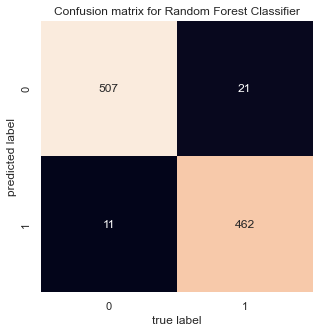

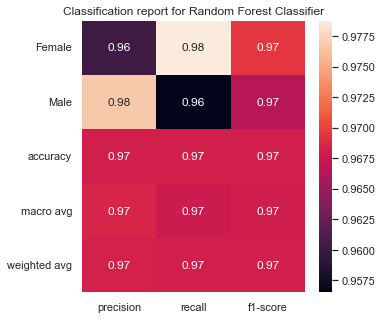

In [338]:
rf=RandomForestClassifier(max_depth=4, max_features='auto',n_estimators=450)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
plot_results(y_test,pred,'Random Forest Classifier',plot_type='all')

## K Fold Validation

In [339]:
import pandas as pd
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
 
#Loading the dataset
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
 
#Implementing cross validation
 
k = 10
kf = KFold(n_splits=k, random_state=None)
model = LogisticRegression(solver= 'liblinear')
 
acc_score = []
 
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.9560878243512974, 0.958, 0.958, 0.954, 0.964, 0.966, 0.962, 0.964, 0.968, 0.962]
Avg accuracy : 0.9612087824351295
